In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
# sns.set_style("ticks")


In [3]:
(df_n_deplete_od := pd.read_excel(
    '~/tyo_lab_pk/04 Raw Data/EXP_0003_PK_20240716 repeat N+ to N-.xlsx',
    sheet_name='Day 5 - N- OD',
    usecols='A:I',
    skiprows=3,
    nrows=(8 * 12) + 1,
))

,timestamp,elapsed_time_hr,sample_id,strain_id,condition,conc_factor,od_blank_diluted,od_sample_diluted,od_sample
0,2024-07-18 21:00:00,0.0,1.0,KSF001,1. N- G+ A- PO4-,4.0,0.039,0.196,0.628
1,2024-07-18 21:00:00,0.0,2.0,KSF087,1. N- G+ A- PO4-,4.0,0.039,0.184,0.580
2,2024-07-18 21:00:00,0.0,3.0,KSF172,1. N- G+ A- PO4-,4.0,0.039,0.184,0.580
3,2024-07-18 21:00:00,0.0,4.0,KSF001,2. N- G+ A+ PO4+,4.0,0.040,0.194,0.616
4,2024-07-18 21:00:00,0.0,5.0,KSF087,2. N- G+ A+ PO4+,4.0,0.040,0.187,0.588
...,...,...,...,...,...,...,...,...,...
91,2024-07-22 10:00:00,85.0,8.0,KSF087,3. N- G+ A+ PO4-,6.0,0.038,0.140,0.612
92,2024-07-22 10:00:00,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2024-07-22 10:00:00,85.0,9.0,KSF001,4. N+ G+ A+ PO4+,6.0,0.055,0.507,2.712
94,2024-07-22 10:00:00,85.0,10.0,KSF087,4. N+ G+ A+ PO4+,6.0,0.055,0.473,2.508


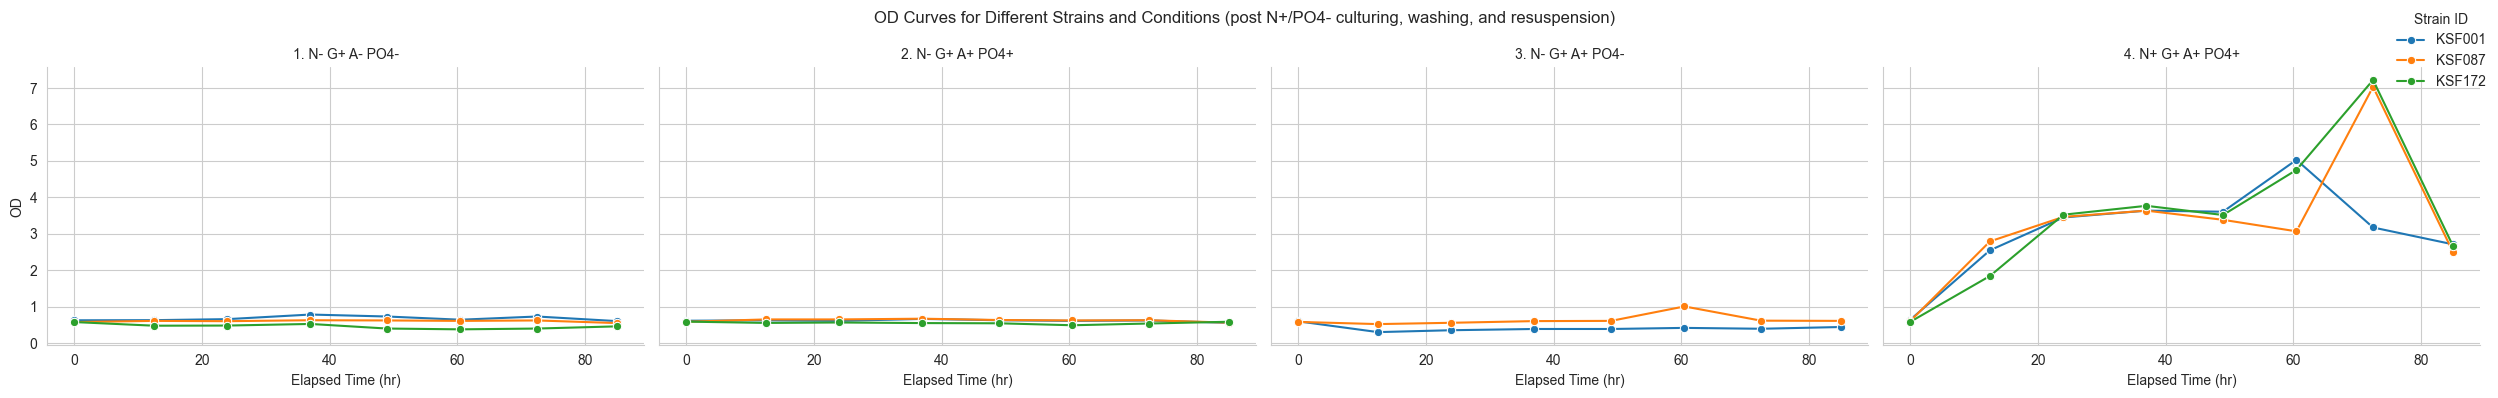

In [4]:
# Set up the FacetGrid
g = sns.FacetGrid(
    df_n_deplete_od,
    col="condition", hue="strain_id",
    col_wrap=4, height=4, aspect=1.5,
    sharey=True, sharex=True
)

# Map the lineplot function to each grid
g.map_dataframe(
    sns.lineplot,
    'elapsed_time_hr', 'od_sample',
    marker='o'
)

# Add legends and adjust layout
g.add_legend(title='Strain ID', loc='upper right')
g.set_axis_labels("Elapsed Time (hr)", "OD")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("OD Curves for Different Strains and Conditions (post N+/PO4- culturing, washing, and resuspension)")

plt.tight_layout()
plt.show()

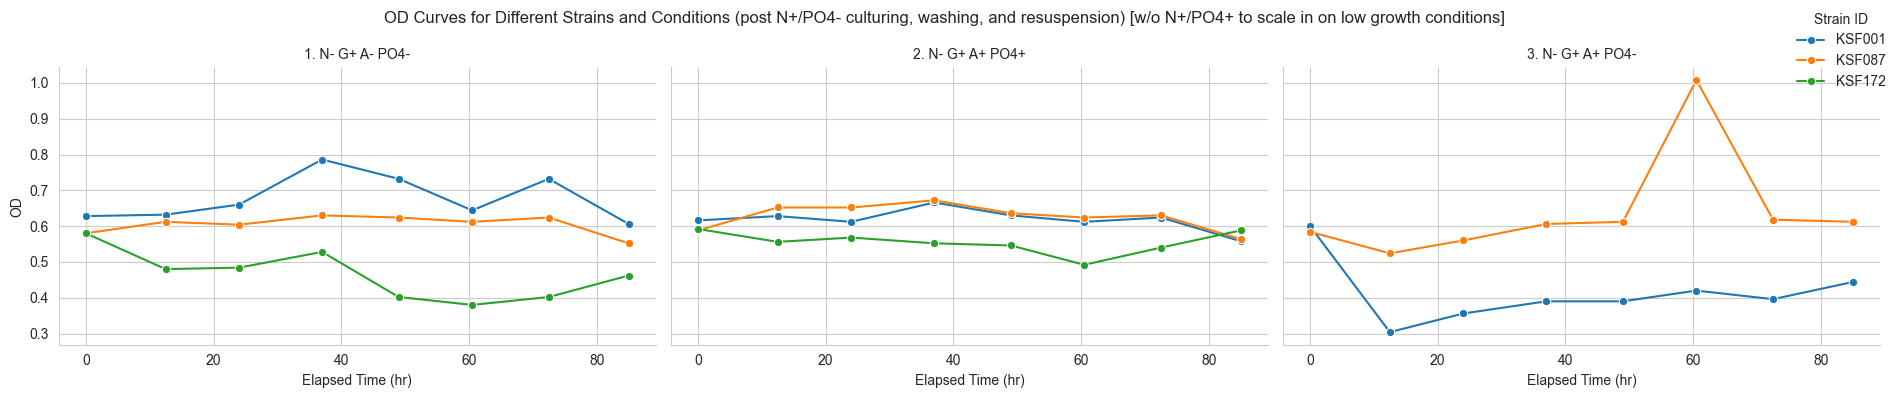

In [5]:
# Set up the FacetGrid
g = sns.FacetGrid(
    # df_n_deplete_od,
    df_n_deplete_od.loc[lambda df: ~df.condition.fillna('4.').str.startswith('4.')],
    col="condition", hue="strain_id",
    col_wrap=3, height=4, aspect=1.5,
    sharey=True, sharex=True
)

# Map the lineplot function to each grid
g.map_dataframe(
    sns.lineplot,
    'elapsed_time_hr', 'od_sample',
    marker='o'
)

# Add legends and adjust layout
g.add_legend(title='Strain ID', loc='upper right')
g.set_axis_labels("Elapsed Time (hr)", "OD")
g.set_titles(col_template="{col_name}")
g.fig.suptitle(
    "OD Curves for Different Strains and Conditions (post N+/PO4- culturing, washing, and resuspension) [w/o N+/PO4+ to scale in on low growth conditions]")

plt.tight_layout()
plt.show()